

# Project: Tmdb Movies Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction about Tmdb Movies Data

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue; budget; revenue; release year, etc.

We'll use this data to find out some answer based on the question as follow:

 1,  What kinds of properties are associated with movies that have high revenues?


 2,  Which genres are most popular from year to year?

 3,  Is a certain genre associated with higher popularity?
 
 Let's get started.


In [125]:
# Set up packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this part, we'll take a look at this data, then extract the data we need, clean the data, to help answer questions. 

### General Properties

In [126]:
# Load data
df = pd.read_csv('tmdb-movies.csv')

In [127]:
# Insepect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [128]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [129]:
df.shape

(10866, 21)

> Based on the information above, we found some probelms with the data, useless colunms; incorract data type; null value rows; duplcated value, we'll fix these problems in the  data cleaning step.




### Data Cleaning (drop colunms; drop null and duplicate value; fix data type; split colunm)

In [130]:
# Drop colunms that we don't need
df=df.drop(columns=['cast','homepage','tagline','keywords','overview', 'production_companies','release_date'])

In [131]:
# Check new data frame
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [132]:
# Check rows with null value
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [133]:
# Drop rows which genres colunm is null
df=df.dropna(subset=['genres'])

In [134]:
df.shape

(10843, 14)

In [135]:
# Drop rows which budget == 0

df=df[df.budget!=0]


In [136]:
df.shape

(5169, 14)

In [137]:
# Drop rows which revenue == 0
df = df[df.revenue!=0]

In [138]:
df.shape

(3855, 14)

In [139]:
# Check duplicate rows
df.duplicated().sum()

1

In [140]:
# Drop duplicate row
df=df.drop_duplicates()

In [141]:
df.shape

(3854, 14)

In [142]:
# Fix id data type
df['id'] = df['id'].astype(object)

In [143]:
# Check new data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   object 
 1   imdb_id         3854 non-null   object 
 2   popularity      3854 non-null   float64
 3   budget          3854 non-null   int64  
 4   revenue         3854 non-null   int64  
 5   original_title  3854 non-null   object 
 6   director        3853 non-null   object 
 7   runtime         3854 non-null   int64  
 8   genres          3854 non-null   object 
 9   vote_count      3854 non-null   int64  
 10  vote_average    3854 non-null   float64
 11  release_year    3854 non-null   int64  
 12  budget_adj      3854 non-null   float64
 13  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 451.6+ KB


In [144]:
# Fix releaser_year data type
df['release_year'] = df['release_year'].astype(object)

In [145]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   object 
 1   imdb_id         3854 non-null   object 
 2   popularity      3854 non-null   float64
 3   budget          3854 non-null   int64  
 4   revenue         3854 non-null   int64  
 5   original_title  3854 non-null   object 
 6   director        3853 non-null   object 
 7   runtime         3854 non-null   int64  
 8   genres          3854 non-null   object 
 9   vote_count      3854 non-null   int64  
 10  vote_average    3854 non-null   float64
 11  release_year    3854 non-null   object 
 12  budget_adj      3854 non-null   float64
 13  revenue_adj     3854 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 451.6+ KB


In [146]:
# Check genres value
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [147]:
# Split rows which genres value contains multiple genre
df=df.drop(['genres'], axis=1).join(df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [148]:
# Check new data frame
df.shape

(10303, 14)

In [149]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


In [150]:
# Save clean data to csv
df.to_csv('df_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now we have get the clean data, we could use the clean data to find the answer of our questions, let's dive into it.

### Q1： What kinds of properties are associated with movies that have high revenues?
> To get the answer od this question, we could use scatter plot to find out if their is correlation between revenue and other values. Accounting for inflation over time, we'll use revenue_adj value instead of revenue.

In [151]:
# Define a scatter plot function
def plot_scatter( xlabel, ylabel):
    title = "Relationship between " + xlabel + " and " +  ylabel
    plt.scatter(data=df,x=xlabel, y=ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

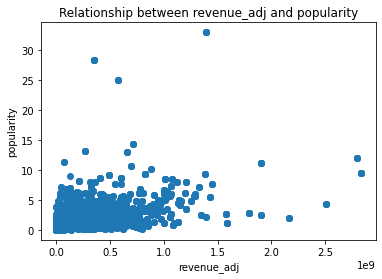

In [152]:
# Explore the relationship between revenue and popularity
plot_scatter("revenue_adj","popularity")  

> Based on the information from this scatter plot, we can see that the movie has higher popularity are more likey to have higher revenue.

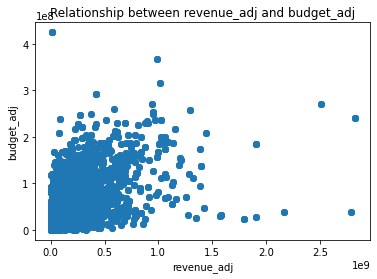

In [153]:
# Explore the relationship between revenue and budget
plot_scatter("revenue_adj","budget_adj")  

> Based on the information from this scatter plot, we can see that the movie has higher budget are more likey to have higher revenue.

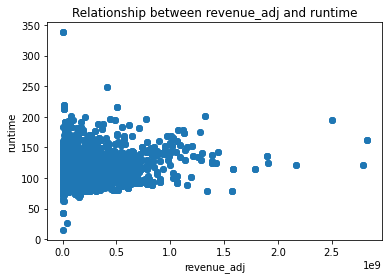

In [154]:
# Explore the relationship between revenue and runtime
plot_scatter("revenue_adj","runtime")  

> Based on the information from this scatter plot, we can see that There is no significant correlation between revenue and runtime.

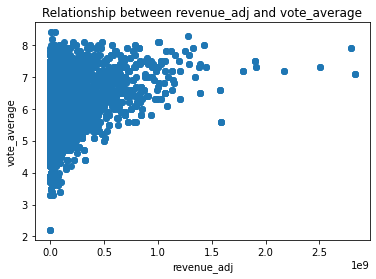

In [155]:
# Explore the relationship between revenue and vote_average
plot_scatter("revenue_adj","vote_average")  

> Based on the information from this scatter plot, we can see that the movie has higher vote_average are more likey to have higher revenue.

## Q2:  Which genres are most popular from year to year?

In [156]:
# Calculate the mean popularity for each genre, group by year
popularity_genre=df.groupby(['release_year','genres']).popularity.mean().to_frame(name='popularity_mean').reset_index()
popularity_genre

,release_year,genres,popularity_mean
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943
...,...,...,...
837,2015,Romance,2.108030
838,2015,Science Fiction,7.594638
839,2015,Thriller,3.913396
840,2015,War,1.943238


> Now we have get the data about mean popularity for each genre, group by year, let's explore the most popular genre in specific year. To have a better understanding of the answer, we'll use bar chart to show the results.

In [157]:
# Extract data in 1960
df_1960=popularity_genre.query('release_year==1960')
df_1960

,release_year,genres,popularity_mean
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943
5,1960,Horror,2.610362
6,1960,Romance,0.501564
7,1960,Thriller,2.610362
8,1960,Western,1.872132


Text(0, 0.5, 'popularity_mean')

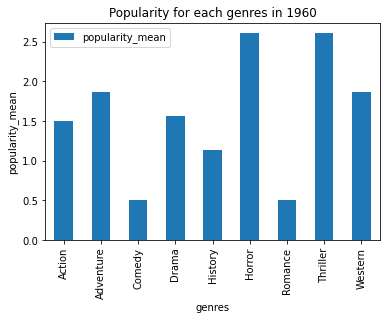

In [158]:
# Plot in bar chart
ax = df_1960.plot.bar(x='genres', y='popularity_mean')
ax.set_title("Popularity for each genres in 1960")
ax.set_xlabel("genres")
ax.set_ylabel("popularity_mean")

> From the bar chart above, we could know the most popular genres in 1960 are horror and thriller.

In [159]:
# Extract data in 2015
df_2015=popularity_genre.query('release_year==2015')
df_2015

,release_year,genres,popularity_mean
825,2015,Action,5.412644
826,2015,Adventure,5.864179
827,2015,Animation,3.169796
828,2015,Comedy,2.112686
829,2015,Crime,2.901992
830,2015,Drama,2.041339
831,2015,Family,3.373933
832,2015,Fantasy,3.326239
833,2015,History,2.258394
834,2015,Horror,1.505638


Text(0, 0.5, 'popularity_mean')

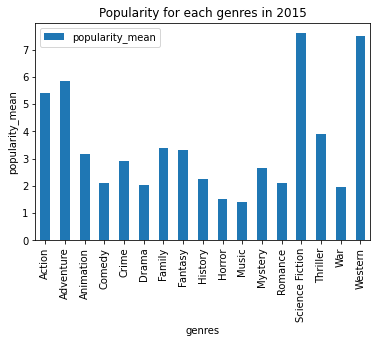

In [160]:
# Plot in bar chart
ax = df_2015.plot.bar(x='genres', y='popularity_mean')
ax.set_title("Popularity for each genres in 2015")
ax.set_xlabel("genres")
ax.set_ylabel("popularity_mean")

> From the bar chart above, we could know the most popular genre in 2015 is science fiction. We could also explore more on other years in the same way.

## Q3: Is a certain genre associated with higher popularity?

In [161]:
# Calculate mean popularity for each genre
df_new=df.groupby('genres').popularity.mean().to_frame(name='mean').reset_index()
df_new

,genres,mean
0,Action,1.567116
1,Adventure,1.867693
2,Animation,1.710622
3,Comedy,1.012321
4,Crime,1.123961
5,Documentary,0.294458
6,Drama,1.001411
7,Family,1.459043
8,Fantasy,1.754315
9,Foreign,0.179608


Text(0, 0.5, 'Mean')

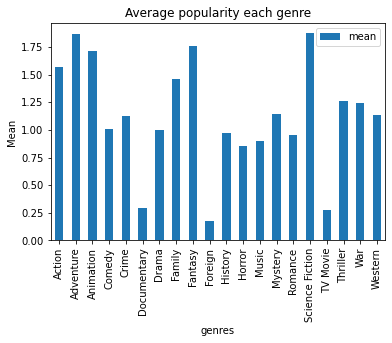

In [162]:
# Plot in bar chart
ax=df_new.plot(kind='bar',x='genres', y='mean',title='Average popularity each genre')
ax.set_ylabel("Mean")

> Based on the bar chart above, we can see that Science fiction; fantasy; adventure; animation movies are more popular than other genres.

<a id='conclusions'></a>
## Conclusions


1, Based on the data we have, we can see that the movie has higher popularity; budget and vote_average more likely to have high revenues. 


 2, There is no significant correlation between revenue and runtime.

3, The most popular genres in 1960 are horror and thriller.

 4, The most popular genre in 2015 is science fiction.


 5, Science fiction; fantasy; adventure; animation movies are more popular than other genres.

## Limitation

1, Because we dropped rows with null value, some key data might been lost in the data cleaning process

2, Even though we have analyzing the relationships between revenue and some other variabels, but the revenue and budget data are not present with currency types, that may cause some misunderstandigs, because different country use different type of currency.



> Now we have already done all the analysis for this project, thanks.